# 1. Mô tả bộ dữ liệu
### Nguồn dữ liệu:
Bộ dữ liệu Iris là một trong những dataset kinh điển trong lĩnh vực học máy, được công bố bởi Ronald A. Fisher (1936) và hiện có sẵn trên thư viện scikit-learn hoặc qua Colab cache để truy cập nhanh. Dữ liệu mô tả các đặc trưng hình thái của ba loài hoa Iris: setosa, versicolor và virginica.
### Mục tiêu bài toán:
Xây dựng mô hình phân loại loài hoa Iris dựa trên các đặc trưng về kích thước cánh hoa và đài hoa.

→ Đây là bài toán phân loại đa lớp (multiclass classification) với 3 nhãn đầu ra.
### Quy mô dữ liệu:
150 mẫu, 6 cột, không có giá trị thiếu.
### Các thuộc tính chính:
| Thuộc tính    | Mô tả                                                         | Kiểu dữ liệu         |
| ------------- | ------------------------------------------------------------- | -------------------- |
| Id            | Mã định danh mẫu dữ liệu                                      | Numeric              |
| SepalLengthCm | Chiều dài đài hoa (cm)                                        | Numeric              |
| SepalWidthCm  | Chiều rộng đài hoa (cm)                                       | Numeric              |
| PetalLengthCm | Chiều dài cánh hoa (cm)                                       | Numeric              |
| PetalWidthCm  | Chiều rộng cánh hoa (cm)                                      | Numeric              |
| Species       | Loài hoa (*Iris-setosa*, *Iris-versicolor*, *Iris-virginica*) | Categorical (Target) |

### Đặc điểm dữ liệu:

- Không có giá trị thiếu (NaN = 0%).

- Biến mục tiêu Species có 3 lớp, mỗi lớp gồm 50 mẫu (phân bố cân bằng).

- Tất cả thuộc tính đặc trưng đều là dữ liệu số liên tục → có thể áp dụng trực tiếp cho các mô hình học máy.

- Cần chuẩn hóa dữ liệu trước khi huấn luyện để tối ưu hiệu suất mô hình.

### Chất lượng và xử lý dữ liệu:

- Dữ liệu sạch, không cần loại bỏ mẫu.

- Biến phân loại “Species” được mã hóa bằng Label Encoding (Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2).

- Áp dụng StandardScaler để chuẩn hóa các biến số.

### Ứng dụng và phạm vi sử dụng:

- Là bộ dữ liệu mẫu kinh điển để:

  - Minh họa các thuật toán học máy cơ bản (Logistic Regression, SVM, KNN, Decision Tree, Random Forest).

  - Đánh giá, so sánh và trực quan hóa ranh giới phân loại giữa các lớp.

  - Thực hành quy trình tiền xử lý – huấn luyện – đánh giá trong các dự án AI.

# 2. Quy tình chia dữ liệu và huấn luyện mô hình SVM Linear

## 2.1 Tải và đọc dữ liệu

In [1]:
import kagglehub
import pandas as pd
import glob
import os

# Tải dữ liệu từ kagglehub
try:
    path = kagglehub.dataset_download("uciml/iris")
except Exception as e:
    print(f"Lỗi khi tải dữ liệu: {e}")
    exit()

csv_files = glob.glob(os.path.join(path, '*.csv'))

if not csv_files:
    print("Không tìm thấy file CSV nào trong thư mục đã tải.")
    exit()

data_file_path = csv_files[0]
df = pd.read_csv(data_file_path)

print("  PHÂN TÍCH CÁC NHÃN/GIÁ TRỊ ĐỘC NHẤT TRONG DỮ LIỆU  ")

for col in df.columns:
    print(f"\n--- Cột: {col} (Dtype: {df[col].dtype}) ---")

    if df[col].dtype == 'object':
        print("Các nhãn/giá trị độc nhất và tần suất:")
        print(df[col].value_counts(dropna=False).head(10))
        print(f"Tổng số giá trị độc nhất: {df[col].nunique()}")

    elif df[col].dtype == 'int64':
        if df[col].nunique() <= 10:
            print("Các giá trị/nhãn số nguyên và tần suất:")
            print(df[col].value_counts(dropna=False))
        else:
            print(f"Số lượng giá trị độc nhất: {df[col].nunique()}. "
                  f"Giá trị nhỏ nhất: {df[col].min()}, Giá trị lớn nhất: {df[col].max()}.")

    elif df[col].dtype == 'float64':
        print(f"Số lượng giá trị độc nhất: {df[col].nunique()}. "
              f"Giá trị nhỏ nhất: {df[col].min()}, Giá trị lớn nhất: {df[col].max()}.")
        print(f"Tỷ lệ giá trị thiếu (NaN): {df[col].isnull().sum() / len(df) * 100:.2f}%")

print("THÔNG TIN TỔNG QUAN DỮ LIỆU:")
print(df.info())
print("\n5 dòng đầu tiên:")
print(df.head())


Using Colab cache for faster access to the 'iris' dataset.
  PHÂN TÍCH CÁC NHÃN/GIÁ TRỊ ĐỘC NHẤT TRONG DỮ LIỆU  

--- Cột: Id (Dtype: int64) ---
Số lượng giá trị độc nhất: 150. Giá trị nhỏ nhất: 1, Giá trị lớn nhất: 150.

--- Cột: SepalLengthCm (Dtype: float64) ---
Số lượng giá trị độc nhất: 35. Giá trị nhỏ nhất: 4.3, Giá trị lớn nhất: 7.9.
Tỷ lệ giá trị thiếu (NaN): 0.00%

--- Cột: SepalWidthCm (Dtype: float64) ---
Số lượng giá trị độc nhất: 23. Giá trị nhỏ nhất: 2.0, Giá trị lớn nhất: 4.4.
Tỷ lệ giá trị thiếu (NaN): 0.00%

--- Cột: PetalLengthCm (Dtype: float64) ---
Số lượng giá trị độc nhất: 43. Giá trị nhỏ nhất: 1.0, Giá trị lớn nhất: 6.9.
Tỷ lệ giá trị thiếu (NaN): 0.00%

--- Cột: PetalWidthCm (Dtype: float64) ---
Số lượng giá trị độc nhất: 22. Giá trị nhỏ nhất: 0.1, Giá trị lớn nhất: 2.5.
Tỷ lệ giá trị thiếu (NaN): 0.00%

--- Cột: Species (Dtype: object) ---
Các nhãn/giá trị độc nhất và tần suất:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: coun

## 2.2 Kiểm tra thông tin và xử lý dữ liệu

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Giả sử df đã load từ Colab cache Iris dataset
print("Thông tin tổng quan:")
df.info()

print("\nKiểm tra giá trị thiếu:")
print(df.isnull().sum())

# Loại bỏ cột không cần thiết
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# Mã hóa cột Species
if 'Species' in df.columns:
    le = LabelEncoder()
    df['Species'] = le.fit_transform(df['Species'].astype(str))

# Kiểm tra sau khi mã hóa
print("\nSau khi mã hóa:")
print(df.head())

# Loại bỏ các hàng có giá trị thiếu (nếu còn)
df = df.dropna()

print("\nDữ liệu sau khi làm sạch hoàn tất.")


Thông tin tổng quan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

Kiểm tra giá trị thiếu:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Sau khi mã hóa:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6

## 2.3 Chia dữ liệu

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Tách X và y
X = df.drop(columns=['Species'])
y = df['Species']

# Chia tập train/test (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Chuẩn hóa dữ liệu (quan trọng cho SVM Linear)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)


Kích thước tập huấn luyện: (105, 4)
Kích thước tập kiểm tra: (45, 4)


## 2.4 Huấn luyện mô hình SVM Linear

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Khởi tạo mô hình SVM với kernel linear
svm_linear_model = SVC(
    kernel='linear',   # sử dụng linear kernel
    C=1.0,
    random_state=42
)

# Huấn luyện mô hình
svm_linear_model.fit(X_train, y_train)

# Dự đoán
y_pred = svm_linear_model.predict(X_test)

## 2.5 Đánh giá mô hình

Độ chính xác (Accuracy): 0.9111111111111111

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



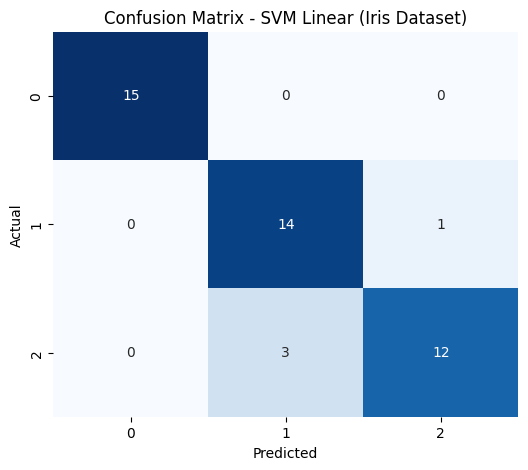

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Độ chính xác và báo cáo
print("Độ chính xác (Accuracy):", accuracy_score(y_test, y_pred))
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM Linear (Iris Dataset)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
